In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [2]:
train_data = pd.read_csv('./emnist-letters-train.csv')
train_data.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.describe()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
count,88799.000000,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,...,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.0
mean,13.519161,0.0,0.0,0.0,0.000011,0.003987,0.016757,0.024640,0.021487,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502906,0.0,0.0,0.0,0.003356,0.544042,1.547695,1.915987,1.803280,1.620203,...,0.0,0.0,0.0,0.823450,0.107386,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [4]:
X_train = train_data.drop('23', axis=1)
X_train

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = train_data['23']

### This dataset is really bad so we have to rotate and then flip the image array to see the true letter.

In [41]:
modified_data: list[cv2.Mat] = []
for image_array in X_train.iloc:
    image_array: np.ndarray = image_array.to_numpy().reshape(28, 28)
    image_array = image_array.astype(np.uint8)
    image: cv2.Mat = cv2.rotate(image_array, rotateCode=cv2.ROTATE_90_CLOCKWISE)
    image = cv2.flip(image, flipCode=1)
    modified_data.append(image)
    # plt.imshow(image, cmap="gray_r")
    # cv2.imshow("Image", image)
    # cv2.waitKey(0)

modified_array = np.array(modified_data)

In [42]:
np.save('modified_array', modified_array)

In [6]:
X_train: np.ndarray = np.load('./modified_array.npy')
X_train.shape

(88799, 28, 28)

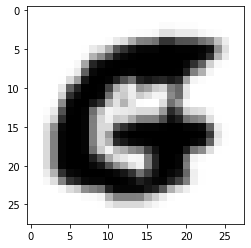

In [7]:
plt.imshow(X_train[0], cmap="gray_r")

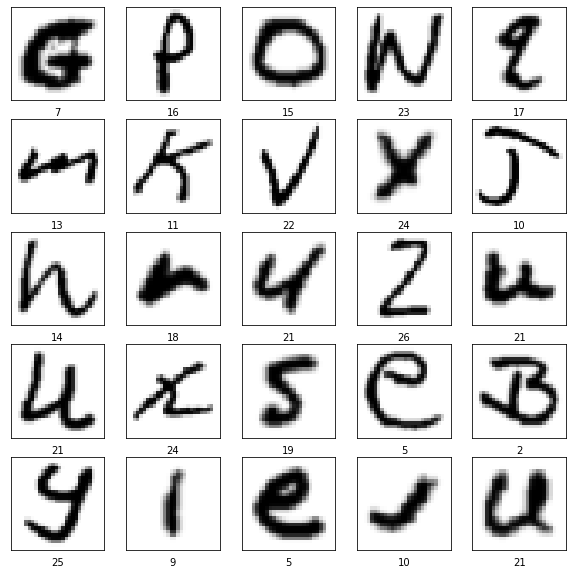

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(27)
])

In [10]:
model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
)

In [11]:
history = model.fit(X_train, y_train, epochs=8, validation_split = 0.2)

Epoch 1/8
2220/2220 [==============================] - 12s 5ms/step - loss: 3.0428 - accuracy: 0.4391 - val_loss: 1.5694 - val_accuracy: 0.5733
Epoch 2/8
2220/2220 [==============================] - 9s 4ms/step - loss: 1.3245 - accuracy: 0.6297 - val_loss: 1.1100 - val_accuracy: 0.6784
Epoch 3/8
2220/2220 [==============================] - 8s 4ms/step - loss: 1.0008 - accuracy: 0.7089 - val_loss: 0.9013 - val_accuracy: 0.7398
Epoch 4/8
2220/2220 [==============================] - 9s 4ms/step - loss: 0.8346 - accuracy: 0.7504 - val_loss: 0.8369 - val_accuracy: 0.7627
Epoch 5/8
2220/2220 [==============================] - 8s 4ms/step - loss: 0.7542 - accuracy: 0.7743 - val_loss: 0.7724 - val_accuracy: 0.7764
Epoch 6/8
2220/2220 [==============================] - 8s 3ms/step - loss: 0.7015 - accuracy: 0.7905 - val_loss: 0.7441 - val_accuracy: 0.7901
Epoch 7/8
2220/2220 [==============================] - 9s 4ms/step - loss: 0.6722 - accuracy: 0.7980 - val_loss: 0.7022 - val_accuracy: 0.798

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
3,0.834567,0.750362,0.836852,0.762669,3
4,0.754195,0.774307,0.772413,0.776351,4
5,0.701459,0.790495,0.744088,0.790090,5
6,0.672174,0.798026,0.702207,0.798480,6
7,0.651676,0.804769,0.730648,0.791723,7


In [13]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

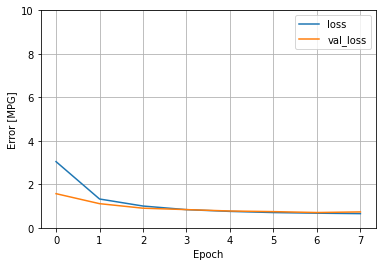

In [14]:
plot_loss(history)

In [15]:
test_data = pd.read_csv('./emnist-letters-test.csv')
test_data.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test_data.describe()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
count,14799.000000,14799.0,14799.0,14799.0,14799.0,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,...,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0
mean,9.757348,0.0,0.0,0.0,0.0,0.000878,0.024123,0.044665,0.018717,0.020677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.344262,0.0,0.0,0.0,0.0,0.106863,1.413602,2.611553,1.100437,1.238699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,14.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,19.000000,0.0,0.0,0.0,0.0,13.000000,108.000000,208.000000,106.000000,126.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X_test = test_data.drop('1', axis=1)
y_test = test_data['1']

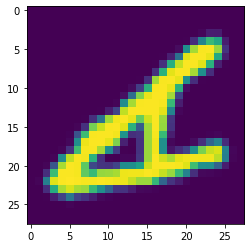

In [44]:
image = X_test.iloc[0].to_numpy().reshape(28, 28)
plt.imshow(image)

In [30]:
modified_data: list[cv2.Mat] = []
for cnt, image_array in enumerate(X_test.iloc):
    image_array: np.ndarray = image_array.to_numpy().reshape(28, 28)
    image_array = image_array.astype(np.uint8)
    image: cv2.Mat = cv2.rotate(image_array, rotateCode=cv2.ROTATE_90_CLOCKWISE)
    image = cv2.flip(image, flipCode=1)
    modified_data.append(image)

modified_array = np.array(modified_data)

In [31]:
np.save('modified_array2', modified_array)

In [53]:
X_test: np.ndarray = np.load('./modified_array2.npy')
X_test.shape

(14799, 28, 28)

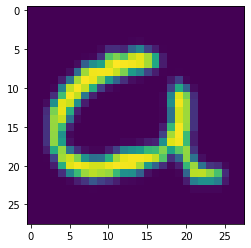

In [58]:
plt.imshow(X_test[1])

In [55]:
pred: np.ndarray = model.predict(X_test)

463/463 [==============================] - 1s 3ms/step


In [59]:
pred[1]

array([-31.914665  ,   7.4600987 ,   2.044925  ,   5.6390047 ,
         3.724773  ,   2.0217755 ,  -1.9854745 ,   4.0212145 ,
        -0.3063708 ,  -3.4508076 ,   4.5142927 ,  -1.152251  ,
        -2.2866788 ,   0.4008935 ,   1.851363  ,   6.0546513 ,
         1.1074802 ,   5.7076683 ,  -0.40324253,   3.590833  ,
        -3.3478787 ,   2.3665242 ,   1.5163362 ,   1.2359328 ,
        -0.4706212 ,   2.1777554 ,   2.2587173 ], dtype=float32)

In [60]:
np.argmax(pred[1])

1